In [2643]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt


In [2644]:
data=pd.read_csv("adult.csv",na_values='?')

In [2645]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2646]:
data.shape

(32561, 15)

In [2647]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [2648]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [2649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2650]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [2651]:
data.duplicated().sum()

np.int64(24)

In [2652]:
# drop duplicated data

data.drop_duplicates(inplace=True)

In [2653]:
data.duplicated().sum()

np.int64(0)

In [2654]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [2655]:
#seperate categorical and numerical features

categorical_features=data.select_dtypes(include="object").columns
numerical_features=data.select_dtypes(exclude="object").columns

In [2656]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [2657]:
numerical_features

c:\Users\Priyanka\Salary_Prediction_End To End ML Project With Deployment\env\Lib\site-packages\IPython\core\displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [2658]:
data['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [2659]:
# let's use for loop for all categorical features

for i in categorical_features:
    print(i,data[i].unique())

    print()
    print("************************************")
    print()

workclass [nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

************************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

************************************

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

************************************

occupation [nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

************************************

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

************************************

race ['White' 'Black' '

In [2660]:
# using mode to replace "?"

# data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
# data['occupation']=data['occupation'].fillna(data['workclass'].mode()[0])
# data['native.country']=data['native.country'].fillna(data['native.country'].mode()[0])


In [2661]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


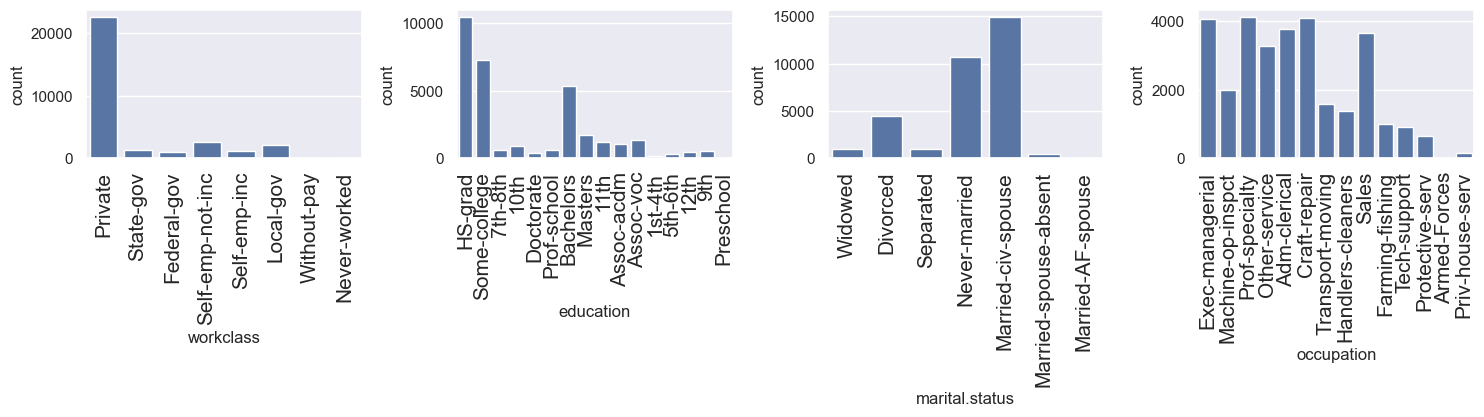

In [2662]:
# data visualisation

plt.style.use('fivethirtyeight')
sns.set_theme(rc={"figure.figsize":(15,6)})

column1 = ['workclass','education','marital.status','occupation']

for i in range(0,len(column1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[column1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

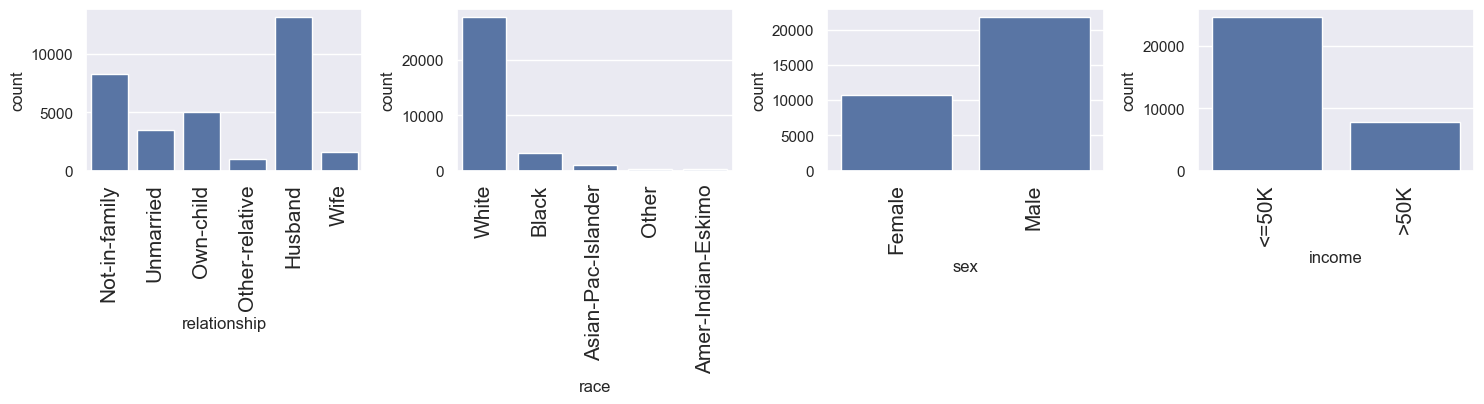

In [2663]:
columns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(columns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

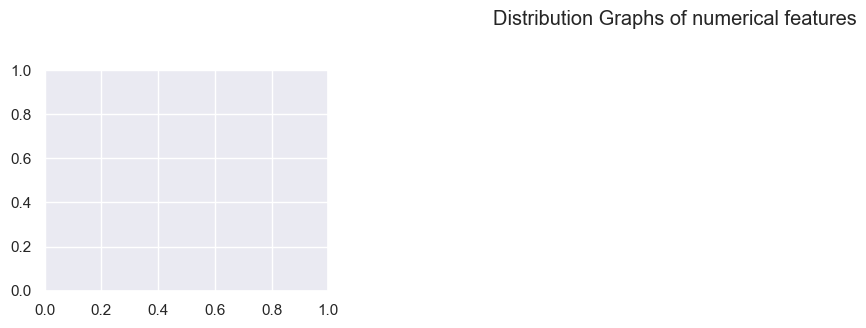

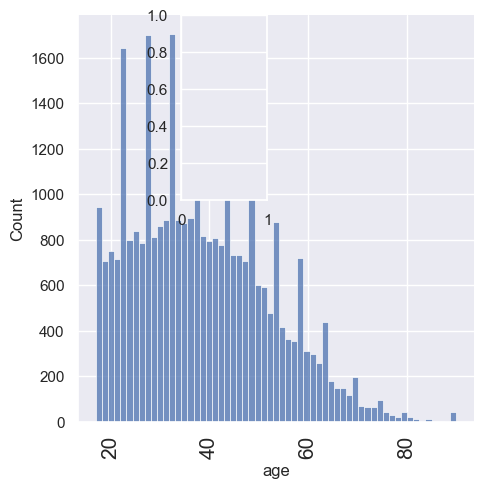

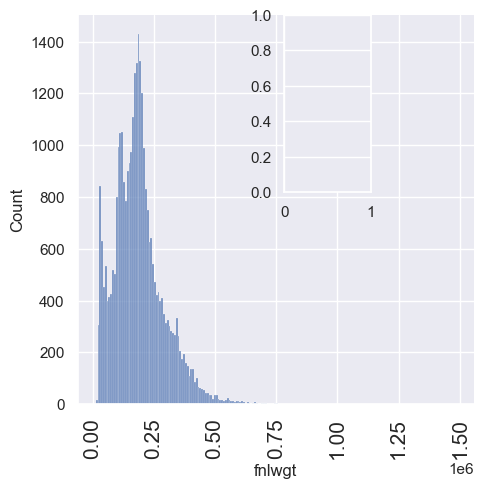

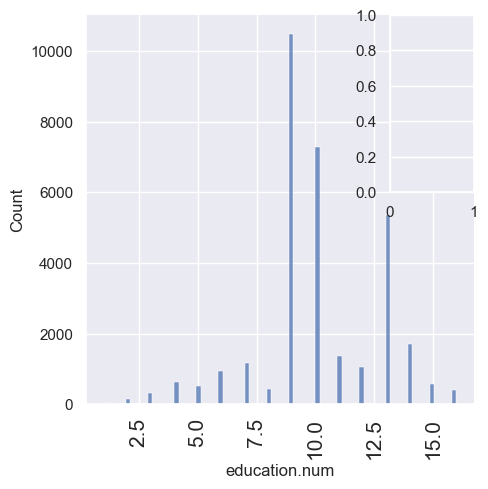

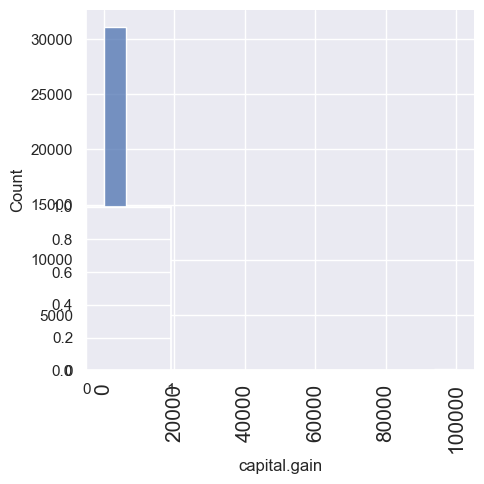

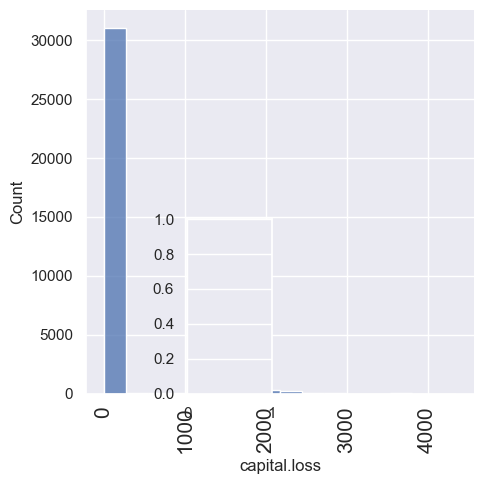

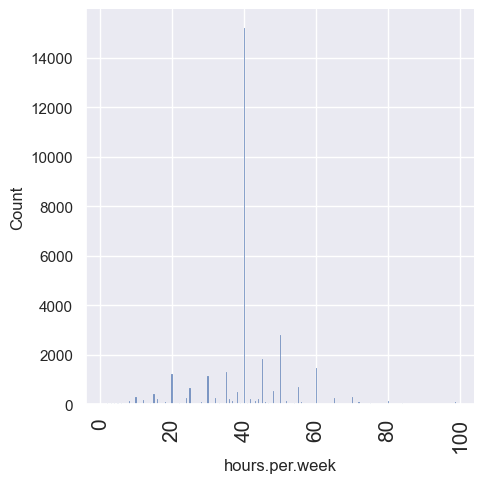

In [2664]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.displot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

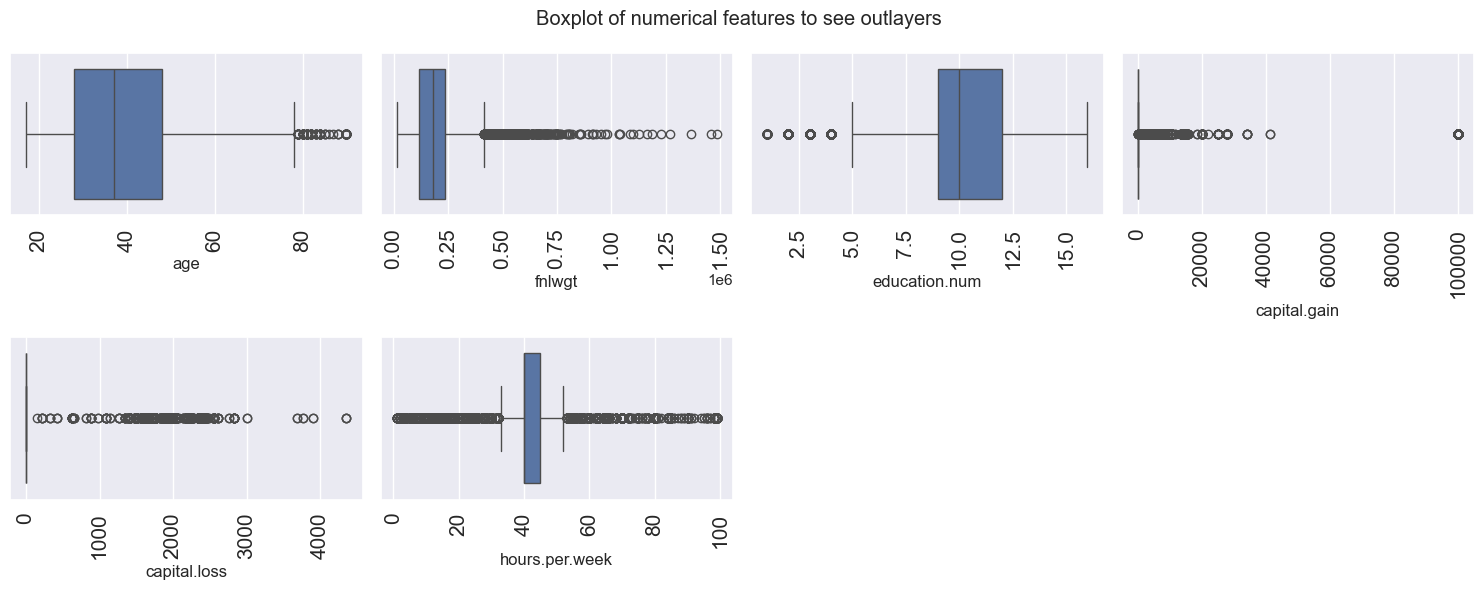

In [2665]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [2666]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='income'>

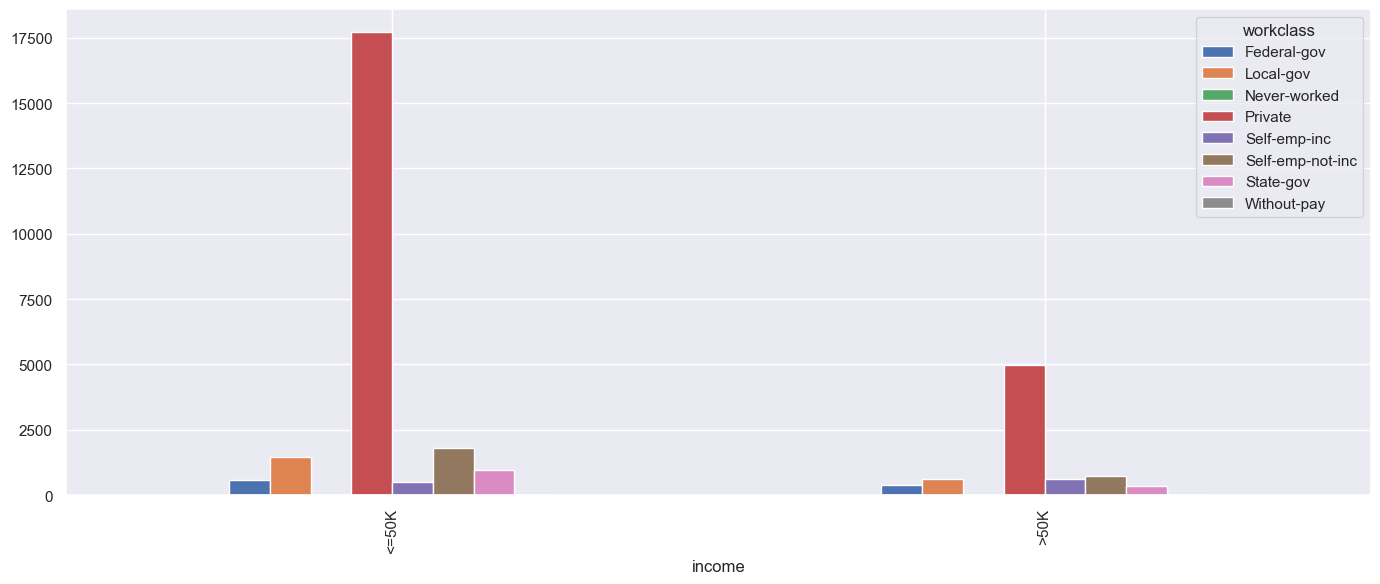

In [2667]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

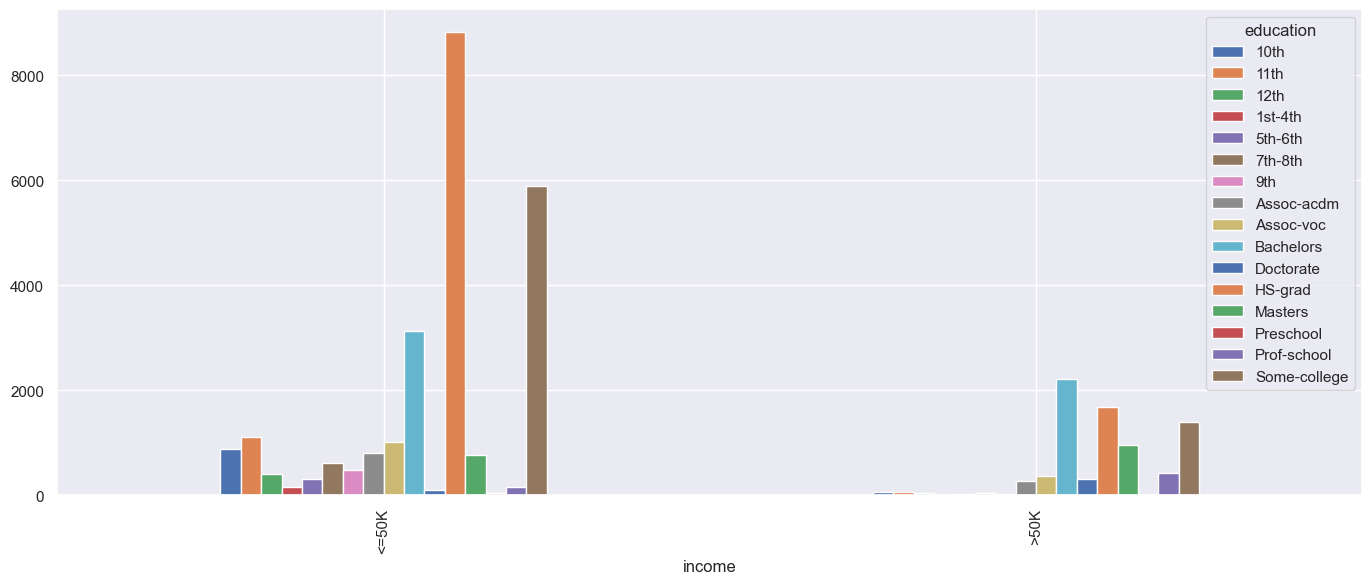

In [2668]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

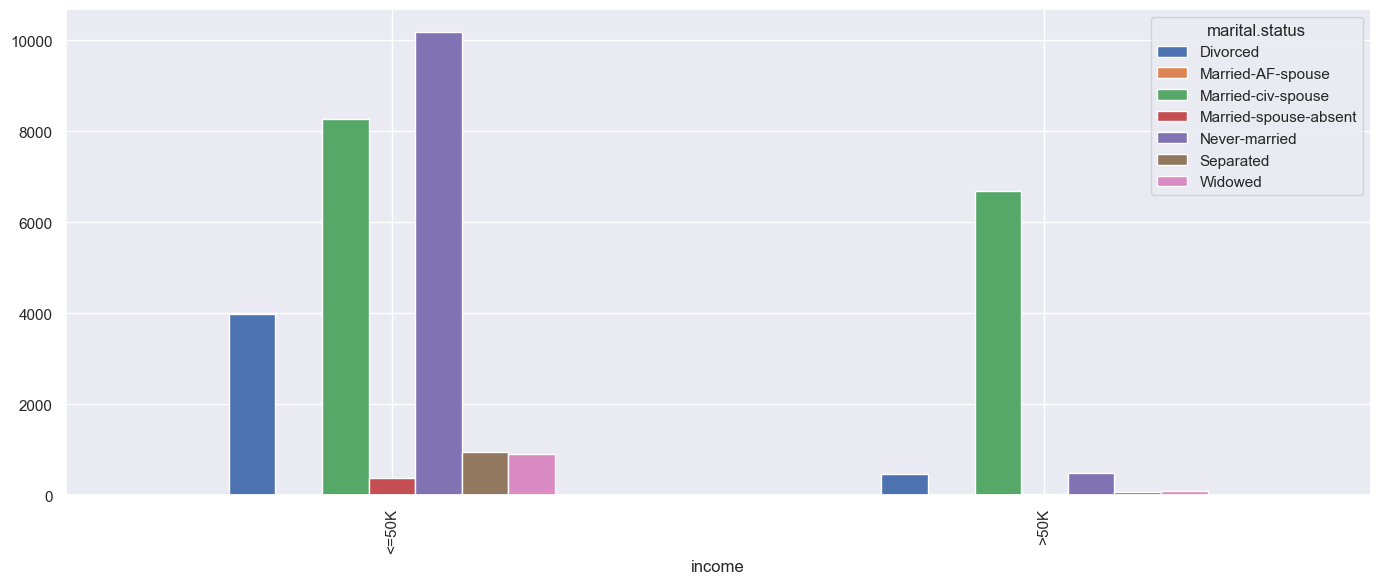

In [2669]:
marital_status = pd.crosstab(data['income'],data['marital.status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

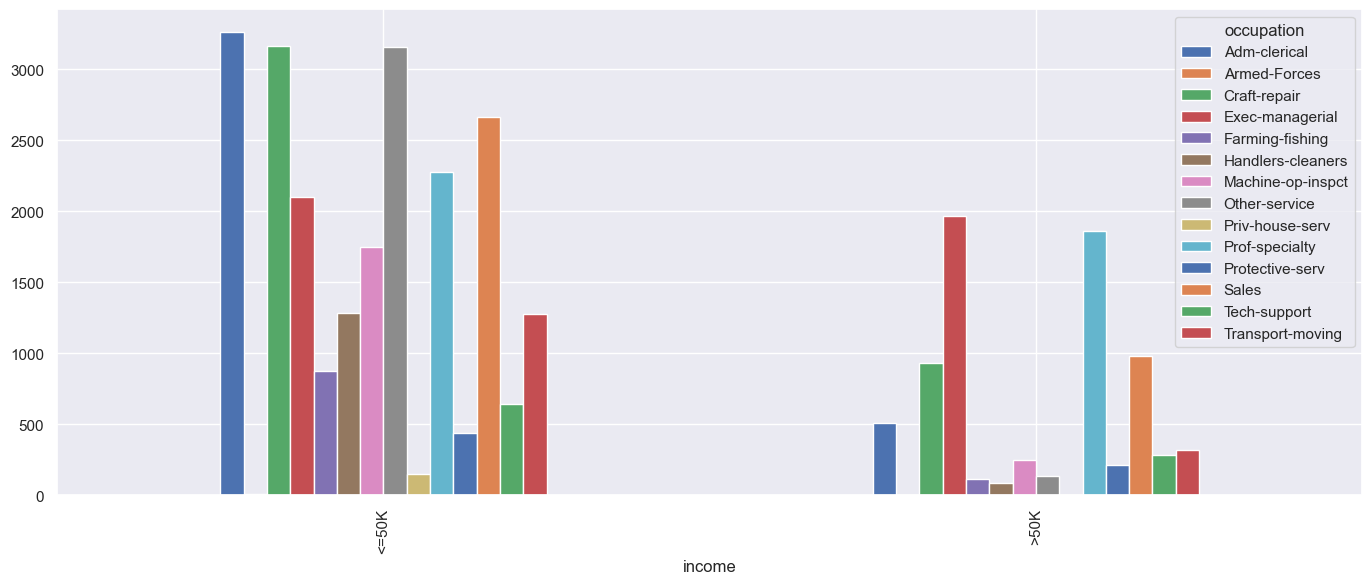

In [2670]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

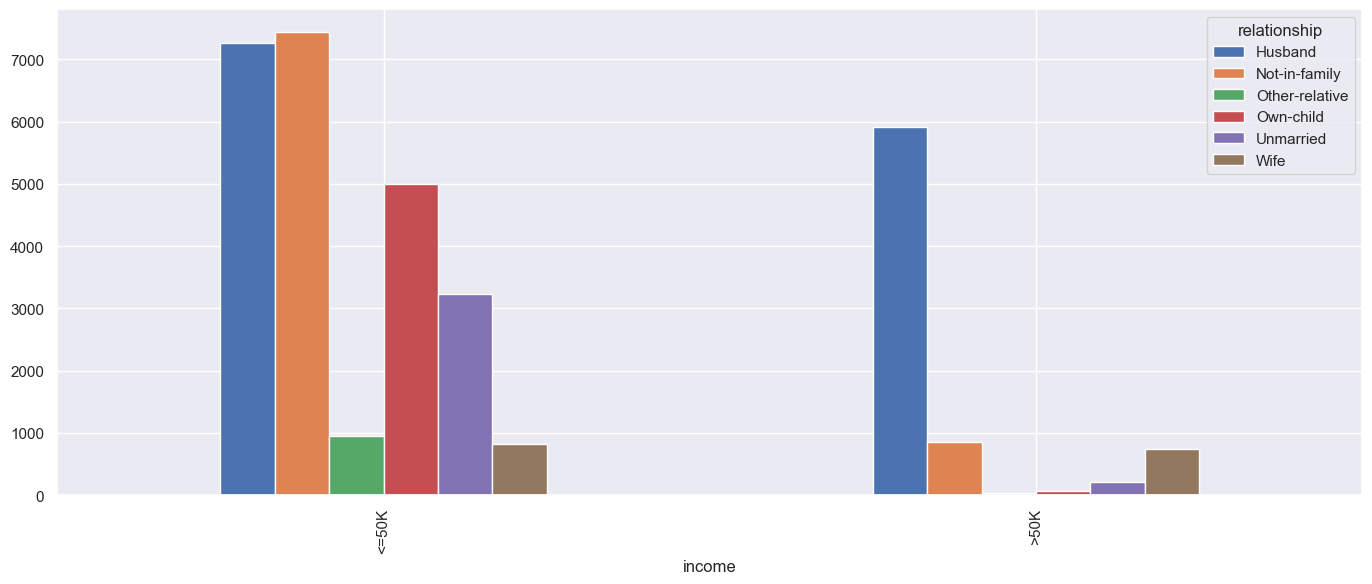

In [2671]:

relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

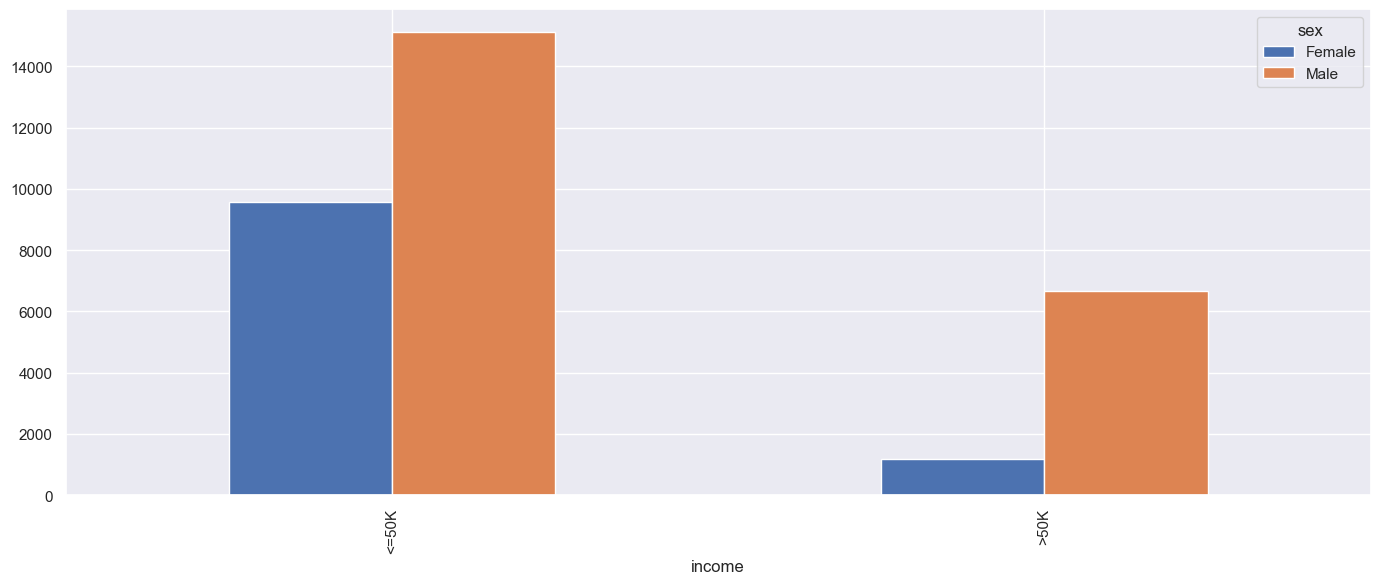

In [2672]:

sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind="bar")

In [2673]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2674]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [2675]:
# droping education_num column because we have education ordinal encorded one
data.drop(["education","fnlwgt", "native.country"],axis=1,inplace=True)

In [2676]:
X=data.drop('income',axis=1)
y=data['income']

In [2677]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [2678]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
trf1=ColumnTransformer([
    ('impute workclass',SimpleImputer(strategy="most_frequent"),[1]),
    ('impute occupation',SimpleImputer(strategy="most_frequent"),[6])
])

In [2679]:
trf1.set_output(transform='pandas')


ColumnTransformer(transformers=[('impute workclass',
                                 SimpleImputer(strategy='most_frequent'), [1]),
                                ('impute occupation',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [2680]:
# One - Hot encoding
from sklearn.preprocessing import OneHotEncoder
trf2=ColumnTransformer([
    ('ohe_transformed',OneHotEncoder() ,slice(0,14))
])

In [2681]:
# feature selection 
from sklearn.feature_selection import SelectKBest,chi2
trf3=SelectKBest(score_func=chi2,k=5)

In [2682]:
from sklearn.tree import DecisionTreeClassifier

trf4=DecisionTreeClassifier()

In [2683]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [2684]:
# preprocessing target column in this case its "income" column 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y_train_encoded=le.fit(y_train)

In [2685]:
y_train_transformed=le.transform(y_train)
y_test_transformed=le.transform(y_test)

In [2686]:
# model training
pipe.fit(X_train,y_train_transformed)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('impute workclass',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1]),
                                                 ('impute occupation',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(transformers=[('ohe_transformed',
                                                  OneHotEncoder(),
                                                  slice(0, 14, None))])),
                ('trf3',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x0000026998D18FE0>)),
                ('trf4', DecisionTreeClassifier())])

In [2687]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22775, 11)
(9762, 11)
(22775,)
(9762,)


In [2688]:
# predict

y_pred=pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9762,))

In [2689]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [2690]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore

In [2691]:
# cross validation using pipeline

from sklearn.model_selection import cross_val_score
cross_val_score(pipe,X_train,y_train_transformed,cv=5,scoring='accuracy').mean()

np.float64(0.7625466520307355)

In [2692]:
# Hyper parameter tuning

# using gridsearch using pipeline on model_name here its trf5

params={'trf4__max_depth':[1,2,3,4,None]}


In [2693]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train_transformed)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(transformers=[('impute '
                                                                         'workclass',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [1]),
                                                                        ('impute '
                                                                         'occupation',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(transformers=[('ohe_transformed',
                                                                         OneHotEncoder(),
                                                                         slice(0, 14, None))])),
                                       ('trf3',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x0000026998D18FE0>)),
                                       ('trf4', DecisionTreeClassifier())]),
             param_grid={'trf4__max_depth': [1, 2, 3, 4, None]},
             scoring='accuracy')

In [2694]:
grid.best_score_

np.float64(0.7625466520307355)

In [2695]:
grid.best_params_

{'trf4__max_depth': 2}

In [2696]:

print(classification_report(y_test_transformed,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7456
           1       0.51      0.07      0.13      2306

    accuracy                           0.76      9762
   macro avg       0.64      0.53      0.50      9762
weighted avg       0.71      0.76      0.69      9762

